In [30]:
import numpy as np
import numpy.random as random
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [39]:
def create_mixtures(A, size_Signal):
    x = np.arange(size_Signal)
    a = np.sin(4*x+np.cos(x))
    b = np.sin(2*x+np.pi/2)
    c = np.sin(3*x-np.pi/3)+np.cos(1.5*x-2*np.pi/5)
    d = np.sin(3*x)*np.sin(2*x)
    
    sources = np.array([a,b,c,d])
    return np.dot(A,sources), sources

def g(y):
    #return np.multiply(np.power(y,2),np.sign(y))
    return np.tanh(10*y)

def f(y):
    return np.multiply(np.power(y,2),np.sign(y))
    #return np.power(y,3)

def NPCA_RLS(mixtures, runs = 5):
    P = np.identity(mixtures.shape[0])
    W = np.identity(mixtures.shape[0])
    #dW = W
    y = np.zeros(mixtures.shape)
    beta = 0.9
    #whitenedMixtures = mixtures
    #whitenedMixtures = whiten(mixtures.T).T
    pca = PCA(whiten=True)
    whitenedMixtures = pca.fit_transform(mixtures.T).T
    i = 0
    #for j in np.arange(runs):
    #    for i in np.arange(whitenedMixtures.shape[1]):
    y[:,i] = np.dot(W, whitenedMixtures[:,i])
    print('y ', y[:,i])
    z = g(y[:,i])
    print('z ', z)
    h = np.dot(P,z)
    print('h', h)
    m = h/(beta + np.dot(z.T, h))
    print('m', m)

    Triangle = P - np.outer(m, h.T)
    #lowerIndices = np.tril_indices(whitenedMixtures.shape[0])
    #Triangle[lowerIndices] = Triangle.T[lowerIndices]

    print('T ', Triangle)
    P = (1/beta) * Triangle
    print('P ', P)
    e =  whitenedMixtures[:,i] - np.dot(W.T,z)
    print('e ', e)

    dW = np.outer(m, e.T)

    print('dW ', dW)
    W = W + dW
    print('W ', W)
    if (np.isnan(W).any() == True):
        print('Lost convergence at iterator %d'%i)
        #break
    elif np.all(np.absolute(W) < 1e-6):
        print('Found convergence at iterator %d on run %d'%(i,j))
        #break
    return y, W

In [40]:
number_Mixtures = 4
size_Signal = 1000
learning_rate = 1e-6

A = np.random.randint(10, size=(number_Mixtures, number_Mixtures))

mixtures, sources = create_mixtures(A,size_Signal)
print(A)

[[5 8 1 1]
 [4 7 6 4]
 [1 2 6 3]
 [6 0 6 8]]


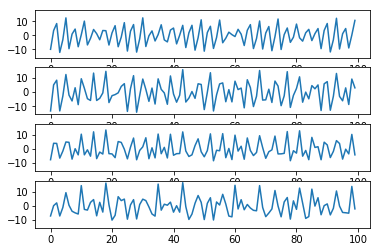

In [41]:
h, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
ax1.plot(mixtures[0,900:])
ax2.plot(mixtures[1,900:])
ax3.plot(mixtures[2,900:])
ax4.plot(mixtures[3,900:])
plt.show()

In [42]:
[y, W] = NPCA_RLS(mixtures, learning_rate)

y  [ 0.79045575  1.56824767 -0.70683873  0.15594864]
z  [ 0.99999973  1.         -0.99999855  0.91533722]
h [ 0.99999973  1.         -0.99999855  0.91533722]
m [ 0.21106664  0.2110667  -0.21106639  0.19319721]
T  [[ 0.78893341 -0.21106664  0.21106634 -0.19319715]
 [-0.21106664  0.7889333   0.21106639 -0.19319721]
 [ 0.21106634  0.21106639  0.78893391  0.19319693]
 [-0.19319715 -0.19319721  0.19319693  0.82315941]]
P  [[ 0.87659268 -0.23451849  0.23451815 -0.2146635 ]
 [-0.23451849  0.87659255  0.23451822 -0.21466356]
 [ 0.23451815  0.23451822  0.87659323  0.21466325]
 [-0.2146635  -0.21466356  0.21466325  0.91462156]]
e  [-0.20954397  0.56824767  0.29315982 -0.75938857]
dW  [[-0.04422774  0.11993813  0.06187626 -0.1602816 ]
 [-0.04422776  0.11993816  0.06187628 -0.16028164]
 [ 0.04422769 -0.11993799 -0.06187619  0.16028141]
 [-0.04048331  0.10978386  0.05663766 -0.14671175]]
W  [[ 0.95577226  0.11993813  0.06187626 -0.1602816 ]
 [-0.04422776  1.11993816  0.06187628 -0.16028164]
 [ 0.04

In [29]:
print(W)

[[ 0.29221851 -0.51122868  0.70454074  0.15814298]
 [ 0.81409518  0.2704864   0.05351984  0.42933531]
 [-0.32852732  0.55663466  0.6616042   0.11092782]
 [-0.27674347 -0.2693689  -0.08105038  0.88338258]]


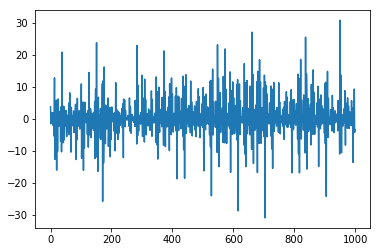

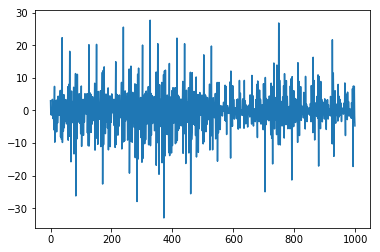

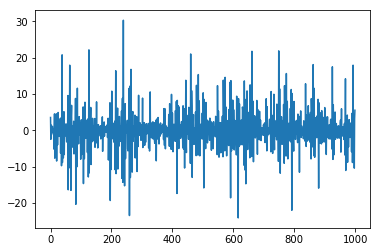

In [23]:
plt.plot(y[0])
plt.show()
plt.plot(y[1])
plt.show()
plt.plot(y[2])
plt.show()

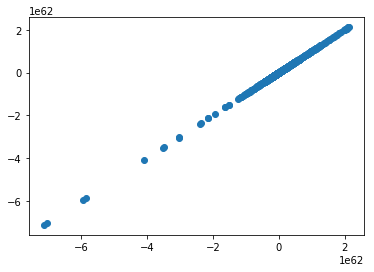

In [12]:
plt.scatter(y[1,:], y[2,:])
plt.show()